In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("dataset2024_clean.csv")
df.head()

,query,docno,relevant,pre,text,post,source_file,text_clean,text_lemma
0,19,98002_0_18,False,I also would not mind a few people to talk to ...,Get my mind off of things.,thank for read,s_99.trec,get my mind off of things,get my mind off of thing
1,11,98004_0_2,True,when I be be preppe for surgery the nurse info...,and I became agitated.,I know they want a sterilize environment for t...,s_99.trec,and i became agitated,and I become agitated
2,17,98004_0_6,False,she start wheel I down to surgery and keep ask...,"Feeling it?""",to which I repeatedly tell she no,s_99.trec,feeling it,feel it
3,18,98006_0_22,False,that be when it will really set in that the wh...,That is when he will realize that he really do...,that he be struggle to even eat 2000 cal in on...,s_99.trec,that is when he will realize that he really do...,that be when he will realize that he really do...
4,18,98006_0_26,False,tldr people be skinny because they do not eat ...,If you are skinny it is because you do not eat...,or you have parasite which you do not,s_99.trec,if you are skinny it is because you do not eat...,if you be skinny it be because you do not eat ...


In [3]:
def preprocessing(corpus):
    return str(corpus).split()


In [4]:
df["token"] = df["text_lemma"].apply(preprocessing)
df["token"].head()

0                      [get, my, mind, off, of, thing]
1                           [and, I, become, agitated]
2                                           [feel, it]
3    [that, be, when, he, will, realize, that, he, ...
4    [if, you, be, skinny, it, be, because, you, do...
Name: token, dtype: object

In [5]:
words = []
for token in df["token"]:
    for i in token:
        if i not in words:
            words.append(i)
words[:30]

['get',
 'my',
 'mind',
 'off',
 'of',
 'thing',
 'and',
 'I',
 'become',
 'agitated',
 'feel',
 'it',
 'that',
 'be',
 'when',
 'he',
 'will',
 'realize',
 'really',
 'do',
 'not',
 'eat',
 'much',
 'at',
 'all',
 'if',
 'you',
 'skinny',
 'because',
 'enough']

In [6]:
def indexing_word(words):
    word_to_idx = {word:idx for idx,word in enumerate(words)}
    idx_to_word = {idx:word for idx,word in enumerate(words)}
    return word_to_idx, idx_to_word

word_to_idx, idx_to_word = indexing_word(words)

In [7]:
for k, v in list(word_to_idx.items())[:20]:
    print(k, ":", v)

get : 0
my : 1
mind : 2
off : 3
of : 4
thing : 5
and : 6
I : 7
become : 8
agitated : 9
feel : 10
it : 11
that : 12
be : 13
when : 14
he : 15
will : 16
realize : 17
really : 18
do : 19


In [8]:
import matplotlib.pyplot as plt
import re, html
from collections import Counter

In [9]:
if "relevant" in df.columns:
    df["label"] = df["relevant"].astype(str).str.lower().map({"true":1, "false":0})
elif "label" in df.columns:
    df["label"] = df["label"].astype(int)
else:
    df["label"] = 0
df.head()

,query,docno,relevant,pre,text,post,source_file,text_clean,text_lemma,token,label
0,19,98002_0_18,False,I also would not mind a few people to talk to ...,Get my mind off of things.,thank for read,s_99.trec,get my mind off of things,get my mind off of thing,"[get, my, mind, off, of, thing]",0
1,11,98004_0_2,True,when I be be preppe for surgery the nurse info...,and I became agitated.,I know they want a sterilize environment for t...,s_99.trec,and i became agitated,and I become agitated,"[and, I, become, agitated]",1
2,17,98004_0_6,False,she start wheel I down to surgery and keep ask...,"Feeling it?""",to which I repeatedly tell she no,s_99.trec,feeling it,feel it,"[feel, it]",0
3,18,98006_0_22,False,that be when it will really set in that the wh...,That is when he will realize that he really do...,that he be struggle to even eat 2000 cal in on...,s_99.trec,that is when he will realize that he really do...,that be when he will realize that he really do...,"[that, be, when, he, will, realize, that, he, ...",0
4,18,98006_0_26,False,tldr people be skinny because they do not eat ...,If you are skinny it is because you do not eat...,or you have parasite which you do not,s_99.trec,if you are skinny it is because you do not eat...,if you be skinny it be because you do not eat ...,"[if, you, be, skinny, it, be, because, you, do...",0


In [10]:
df = df.drop(columns=["relevant"])


In [11]:
df["word_len"] = df["text_lemma"].fillna("").astype(str).str.split().apply(len)


In [12]:
df.head()

,query,docno,pre,text,post,source_file,text_clean,text_lemma,token,label,word_len
0,19,98002_0_18,I also would not mind a few people to talk to ...,Get my mind off of things.,thank for read,s_99.trec,get my mind off of things,get my mind off of thing,"[get, my, mind, off, of, thing]",0,6
1,11,98004_0_2,when I be be preppe for surgery the nurse info...,and I became agitated.,I know they want a sterilize environment for t...,s_99.trec,and i became agitated,and I become agitated,"[and, I, become, agitated]",1,4
2,17,98004_0_6,she start wheel I down to surgery and keep ask...,"Feeling it?""",to which I repeatedly tell she no,s_99.trec,feeling it,feel it,"[feel, it]",0,2
3,18,98006_0_22,that be when it will really set in that the wh...,That is when he will realize that he really do...,that he be struggle to even eat 2000 cal in on...,s_99.trec,that is when he will realize that he really do...,that be when he will realize that he really do...,"[that, be, when, he, will, realize, that, he, ...",0,15
4,18,98006_0_26,tldr people be skinny because they do not eat ...,If you are skinny it is because you do not eat...,or you have parasite which you do not,s_99.trec,if you are skinny it is because you do not eat...,if you be skinny it be because you do not eat ...,"[if, you, be, skinny, it, be, because, you, do...",0,12


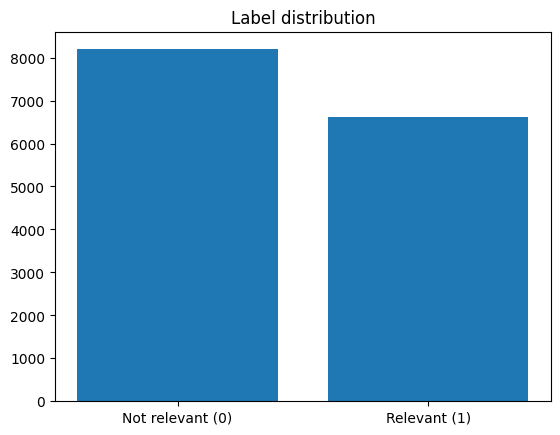

In [13]:
label_counts = df["label"].value_counts().sort_index()
plt.bar(["Not relevant (0)", "Relevant (1)"], [label_counts.get(0,0), label_counts.get(1,0)])
plt.title("Label distribution")
plt.show()

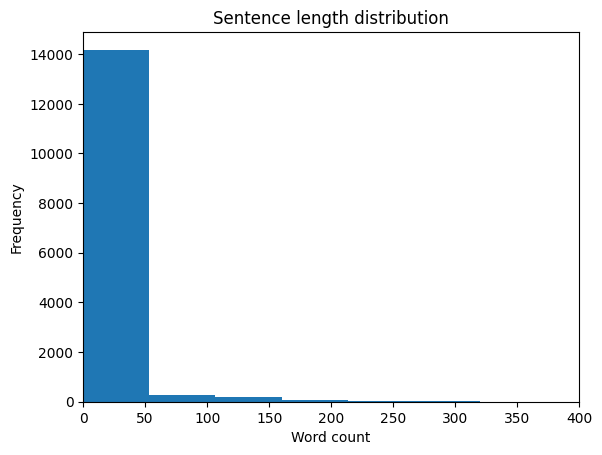

In [14]:
plt.hist(df["word_len"], bins=40)
plt.title("Sentence length distribution")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.xlim(0, 400) 
plt.show()


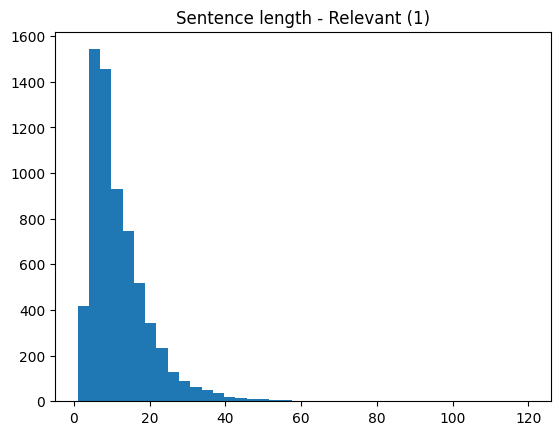

In [15]:
plt.hist(df.loc[df["label"]==1,"word_len"], bins=40)
plt.title("Sentence length - Relevant (1)")
plt.show()


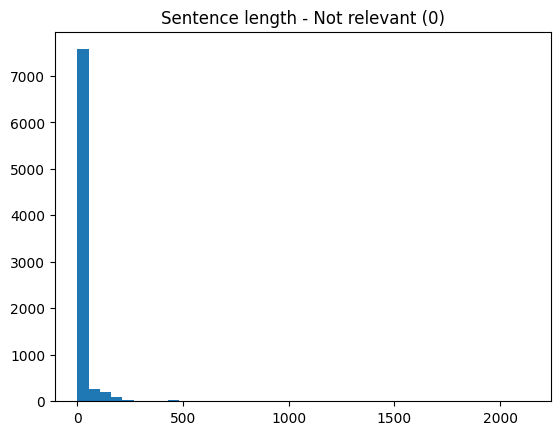

In [16]:
plt.hist(df.loc[df["label"]==0,"word_len"], bins=40)
plt.title("Sentence length - Not relevant (0)")
plt.show()

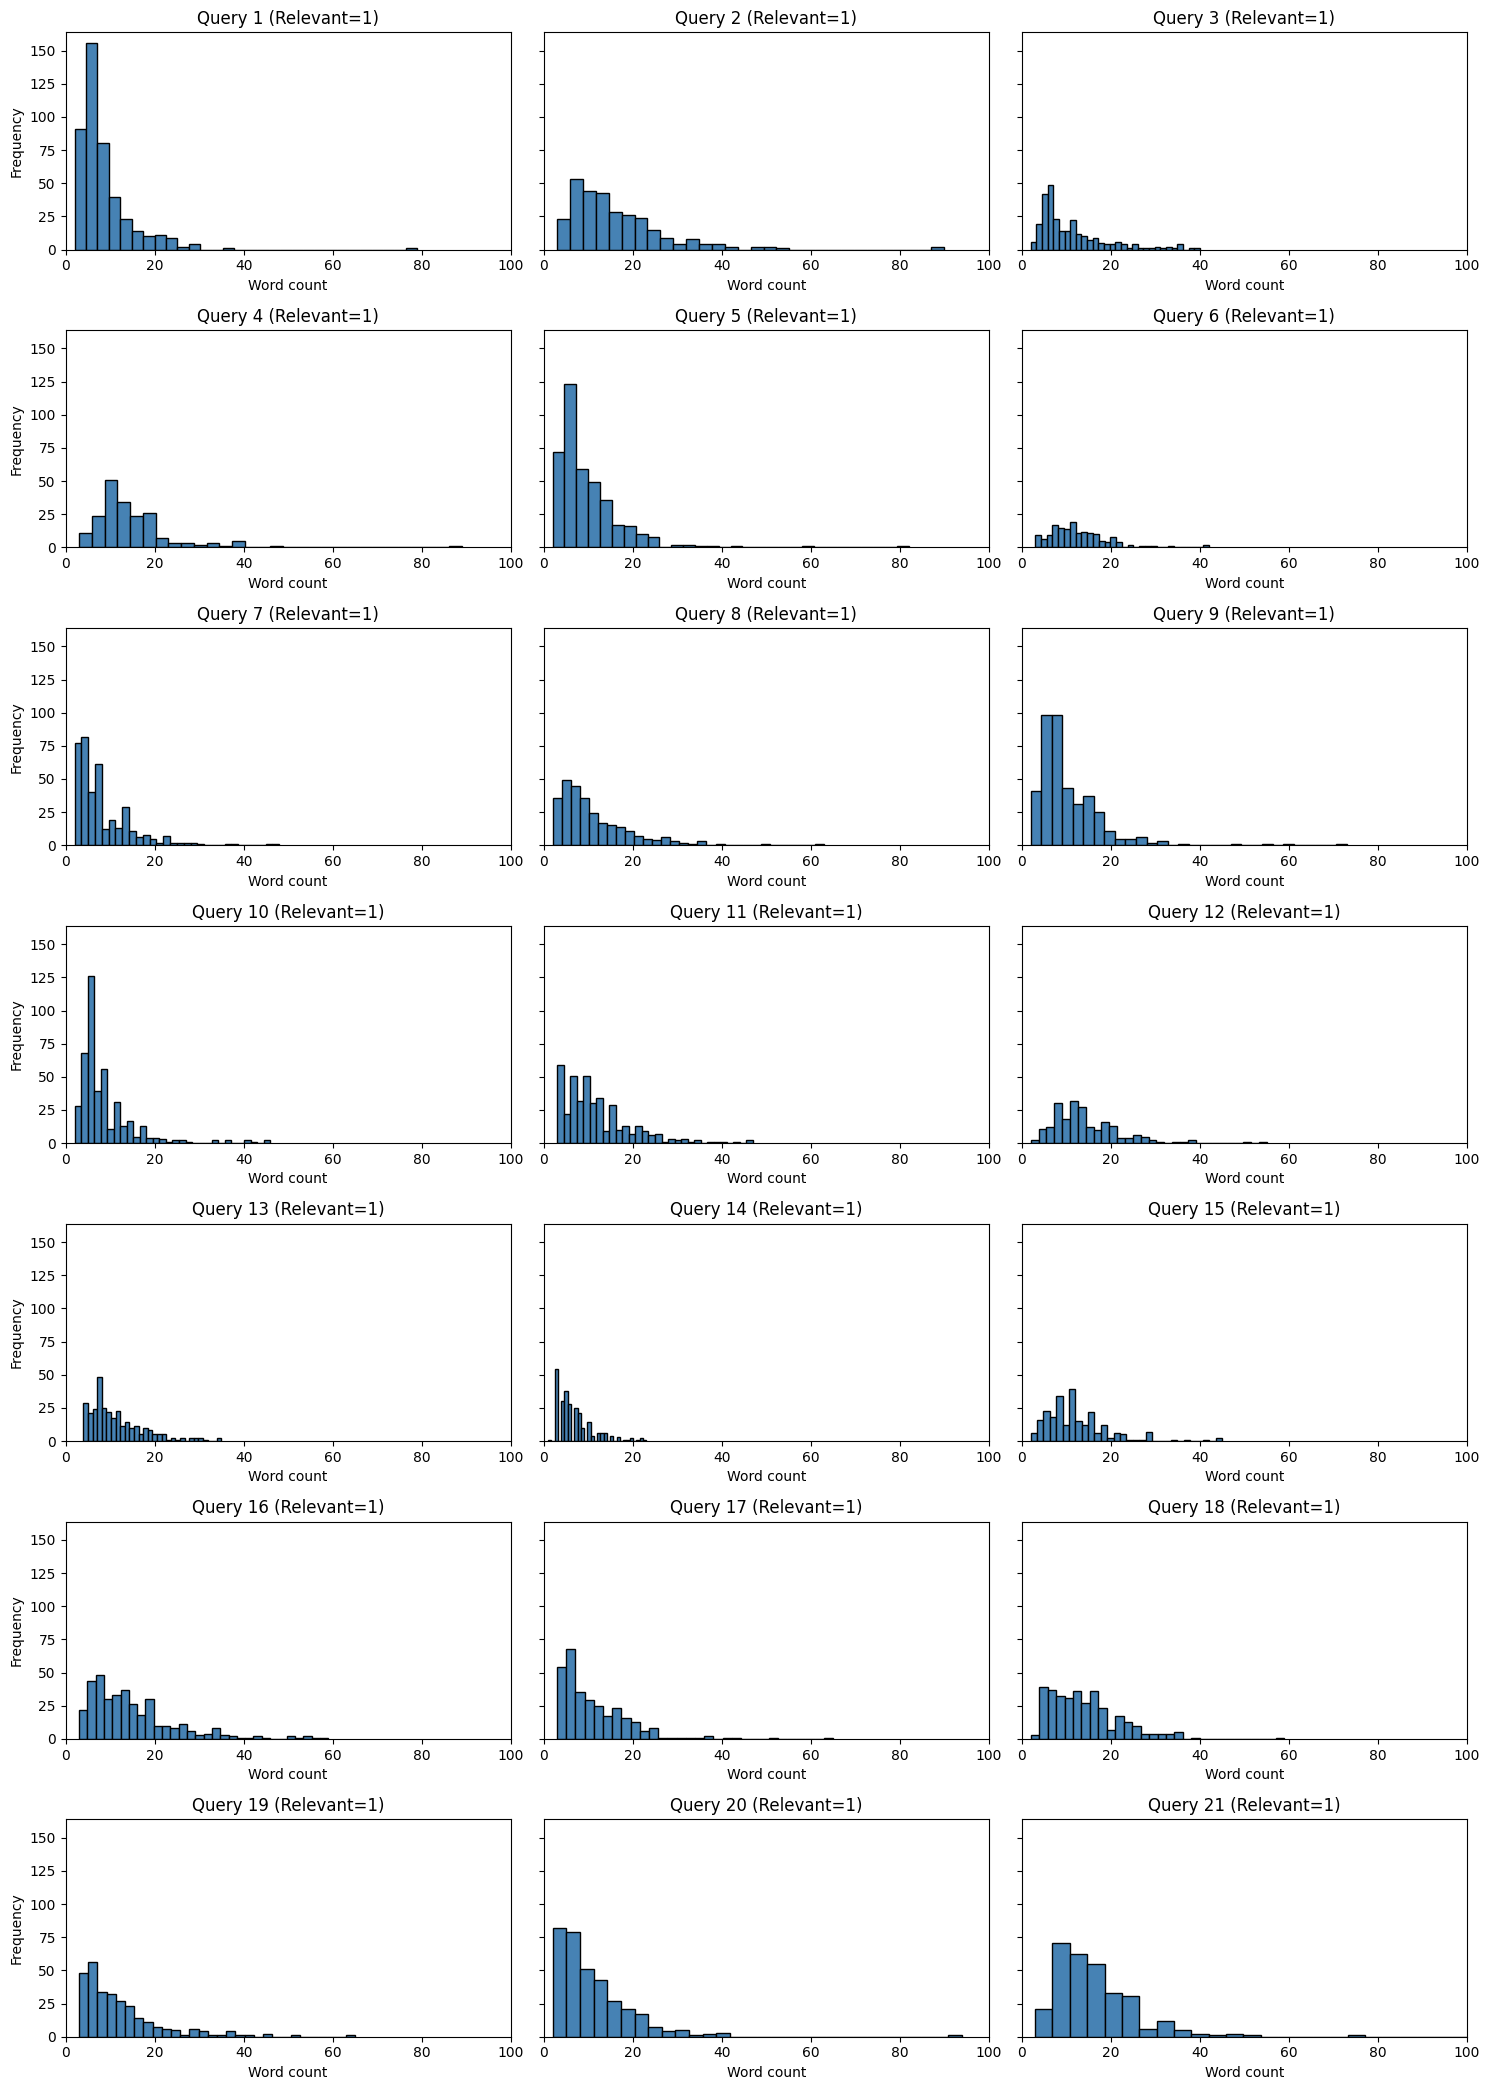

In [17]:
import matplotlib.pyplot as plt

df_rel = df[df["label"] == 1]
queries = sorted(df_rel["query"].unique())

n = len(queries)
cols = 3
rows = (n + cols - 1) // cols   

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3*rows), sharey=True)

for i, q in enumerate(queries):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]
    subset = df_rel[df_rel["query"] == q]
    ax.hist(subset["word_len"], bins=30, color="steelblue", edgecolor="black")
    ax.set_title(f"Query {q} (Relevant=1)")
    ax.set_xlim(0, 100)
    if c == 0:
        ax.set_ylabel("Frequency")
    ax.set_xlabel("Word count")

for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


[('I', 9556), ('feel', 1895), ('like', 676), ('cry', 548), ('time', 540), ('sleep', 443), ('want', 389), ('guilty', 384), ('sex', 352), ('hate', 309), ('thing', 303), ('sad', 298), ('tired', 294), ('think', 285), ('decision', 279), ('day', 270), ('lose', 266), ('energy', 261), ('kill', 256), ('blame', 252), ('worthless', 250), ('future', 229), ('interest', 225), ('depressed', 224), ('know', 219), ('start', 205), ('eat', 203), ('failure', 200), ('enjoy', 196), ('life', 195), ('anymore', 191), ('use', 184), ('lot', 175), ('focus', 175), ('hour', 167), ('angry', 163), ('appetite', 156), ('try', 142), ('right', 142), ('concentrate', 139)]


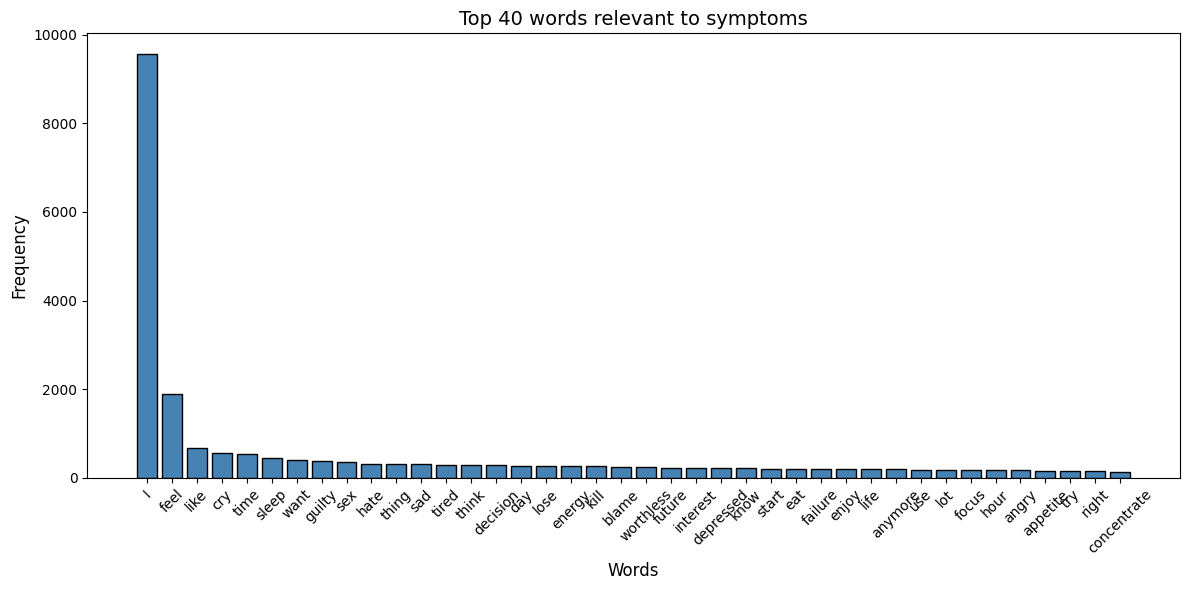

In [18]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

tokens_rel = df.loc[df["label"] == 1, "token"]

all_tokens = [w for toks in tokens_rel for w in toks if w not in stop_words]

counter = Counter(all_tokens)
top_words = counter.most_common(40)

print(top_words)

words, freqs = zip(*top_words)
plt.figure(figsize=(12,6))   
plt.bar(words, freqs, color="steelblue", edgecolor="black")
plt.xticks(rotation=45)
plt.title("Top 40 words relevant to symptoms", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Words", fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
df["token_no_stop"] = df["token"].apply(lambda toks: [w for w in toks if w.lower() not in stop_words])
df["token_no_stop"].head()

0     [mind, thing]
1        [agitated]
2            [feel]
3    [realize, eat]
4     [skinny, eat]
Name: token_no_stop, dtype: object

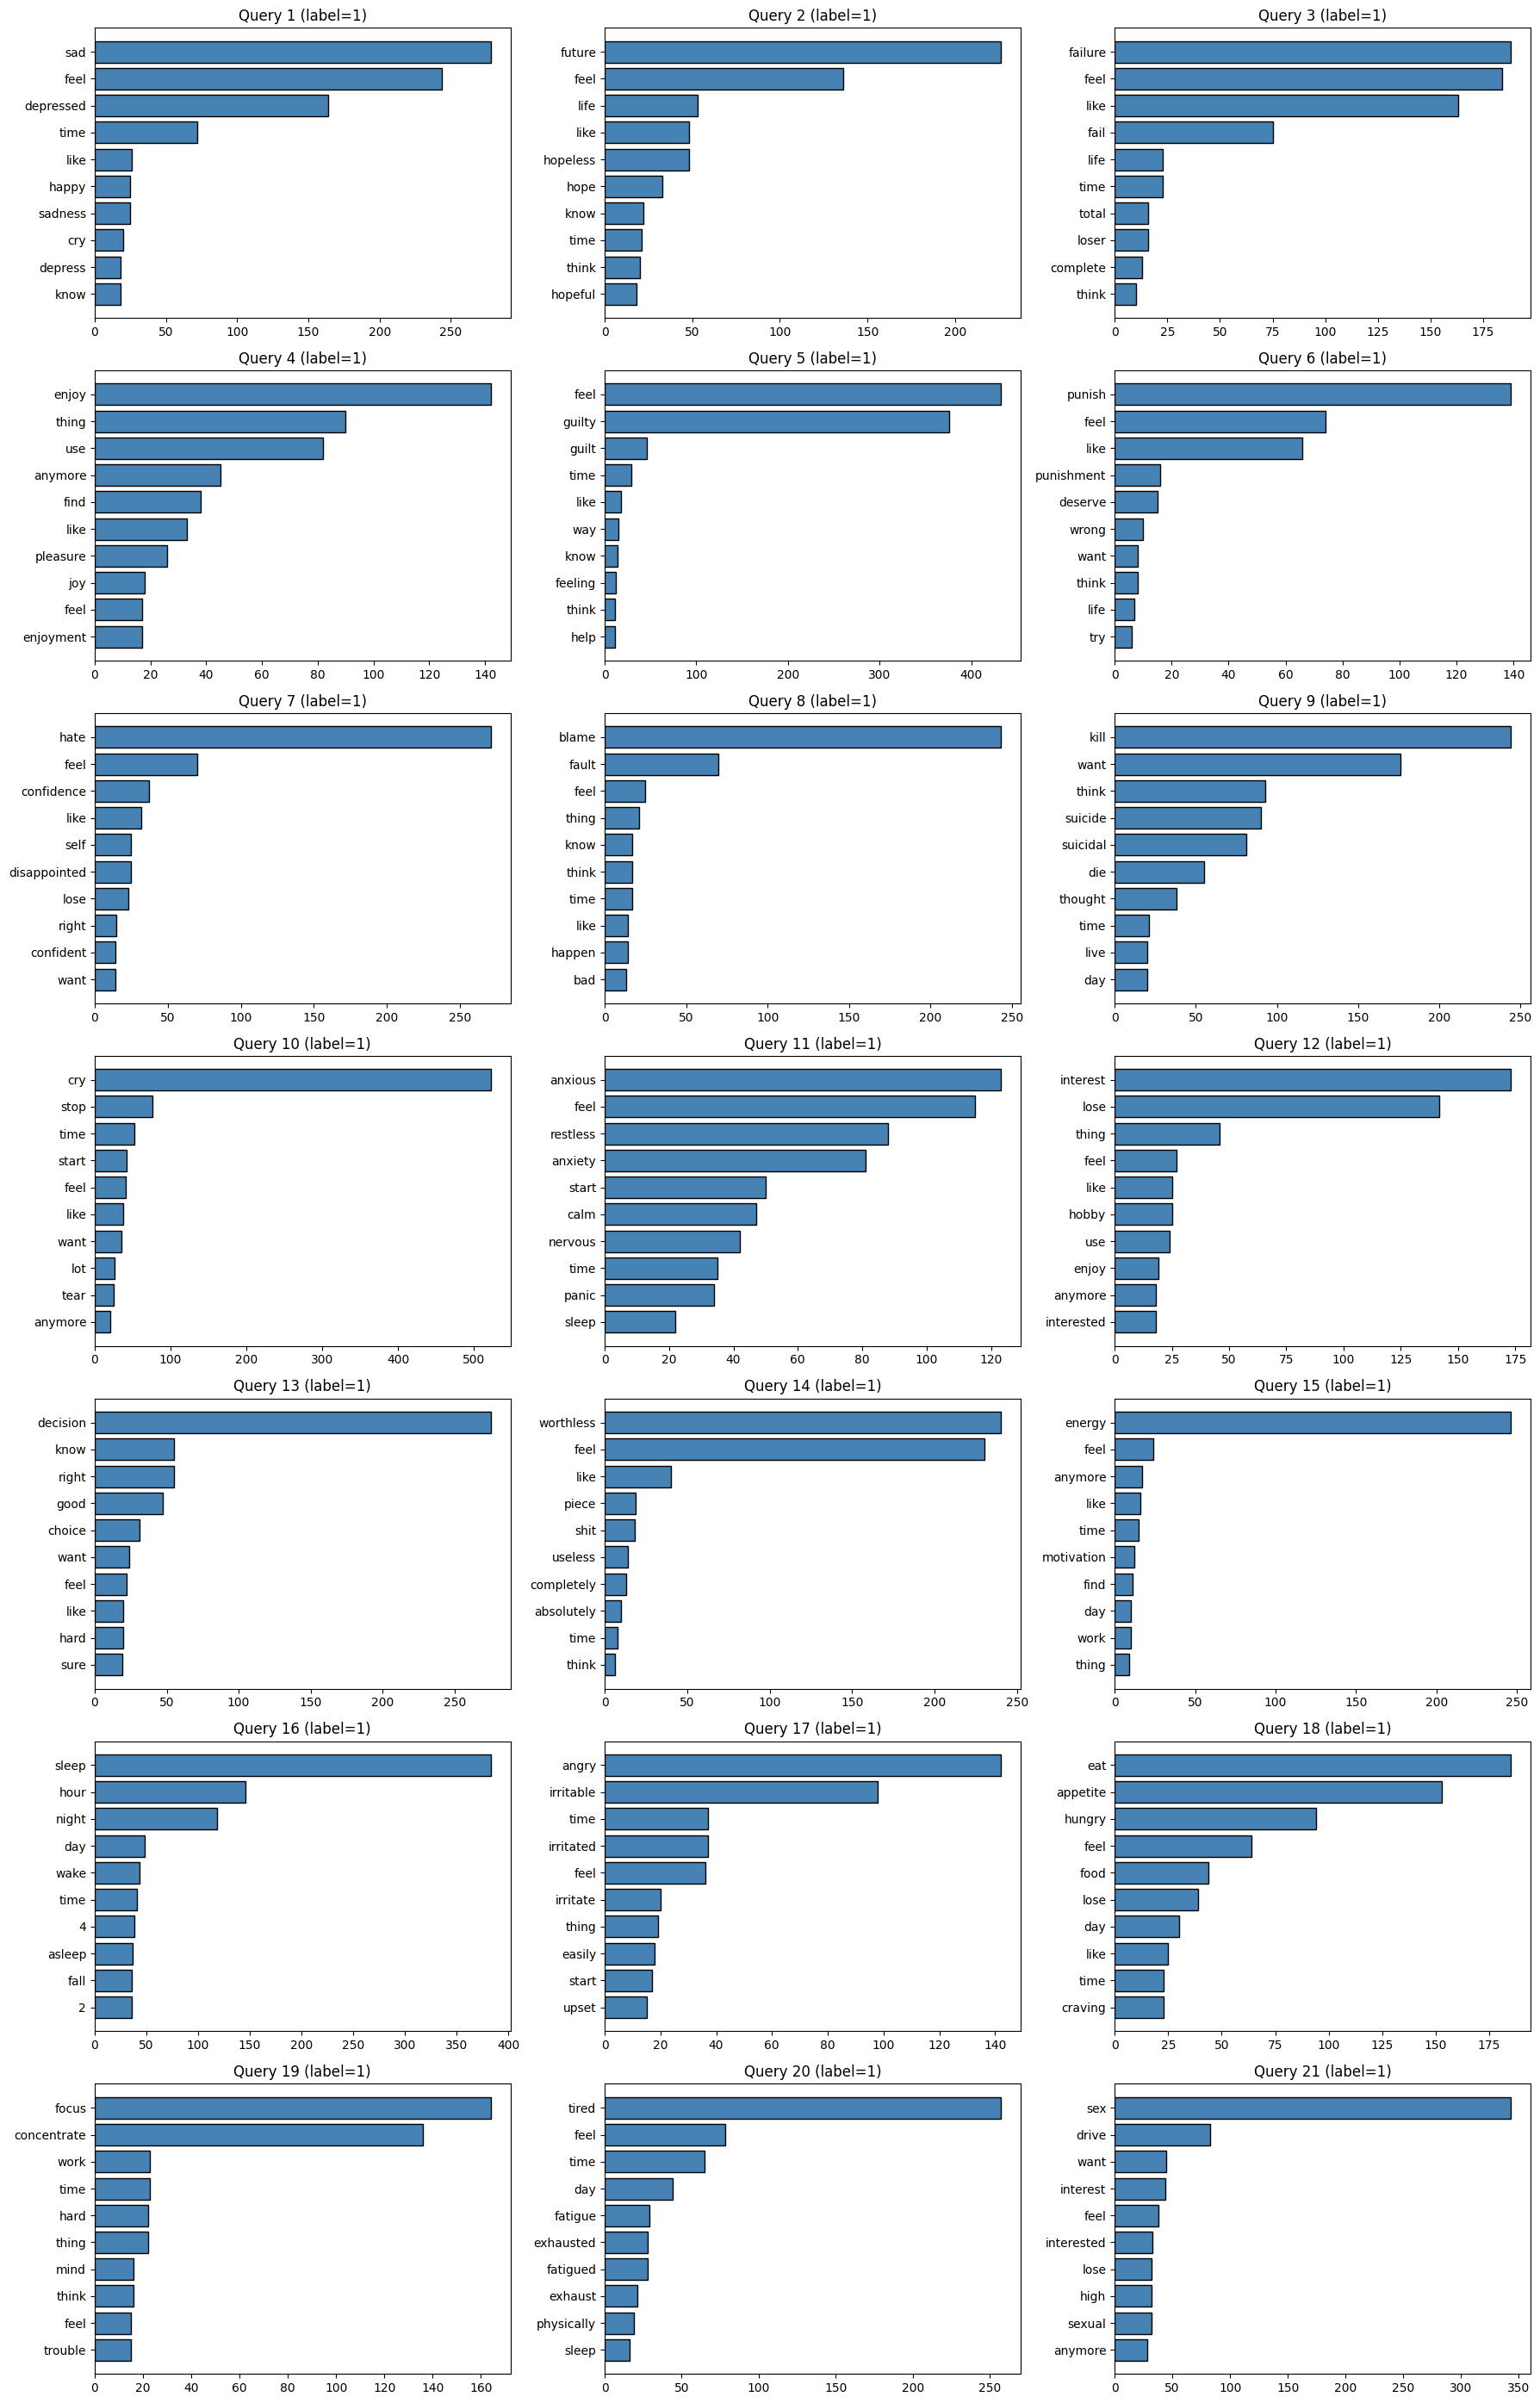

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

df_rel = df[df["label"] == 1]

queries = sorted(df_rel["query"].unique())

cols = 3
rows = (len(queries) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))

for i, q in enumerate(queries):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]

    tokens = [w for toks in df_rel.loc[df_rel["query"] == q, "token_no_stop"] for w in toks]

    counter = Counter(tokens)
    top_words = counter.most_common(10)

    if top_words:
        words, freqs = zip(*top_words)
        ax.barh(range(len(words)), freqs, color="steelblue", edgecolor="black")
        ax.set_yticks(range(len(words)))
        ax.set_yticklabels(words)
        ax.invert_yaxis()  
        ax.set_title(f"Query {q} (label=1)")
    else:
        ax.set_title(f"Query {q} (No data)")
        ax.axis("off")

for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()



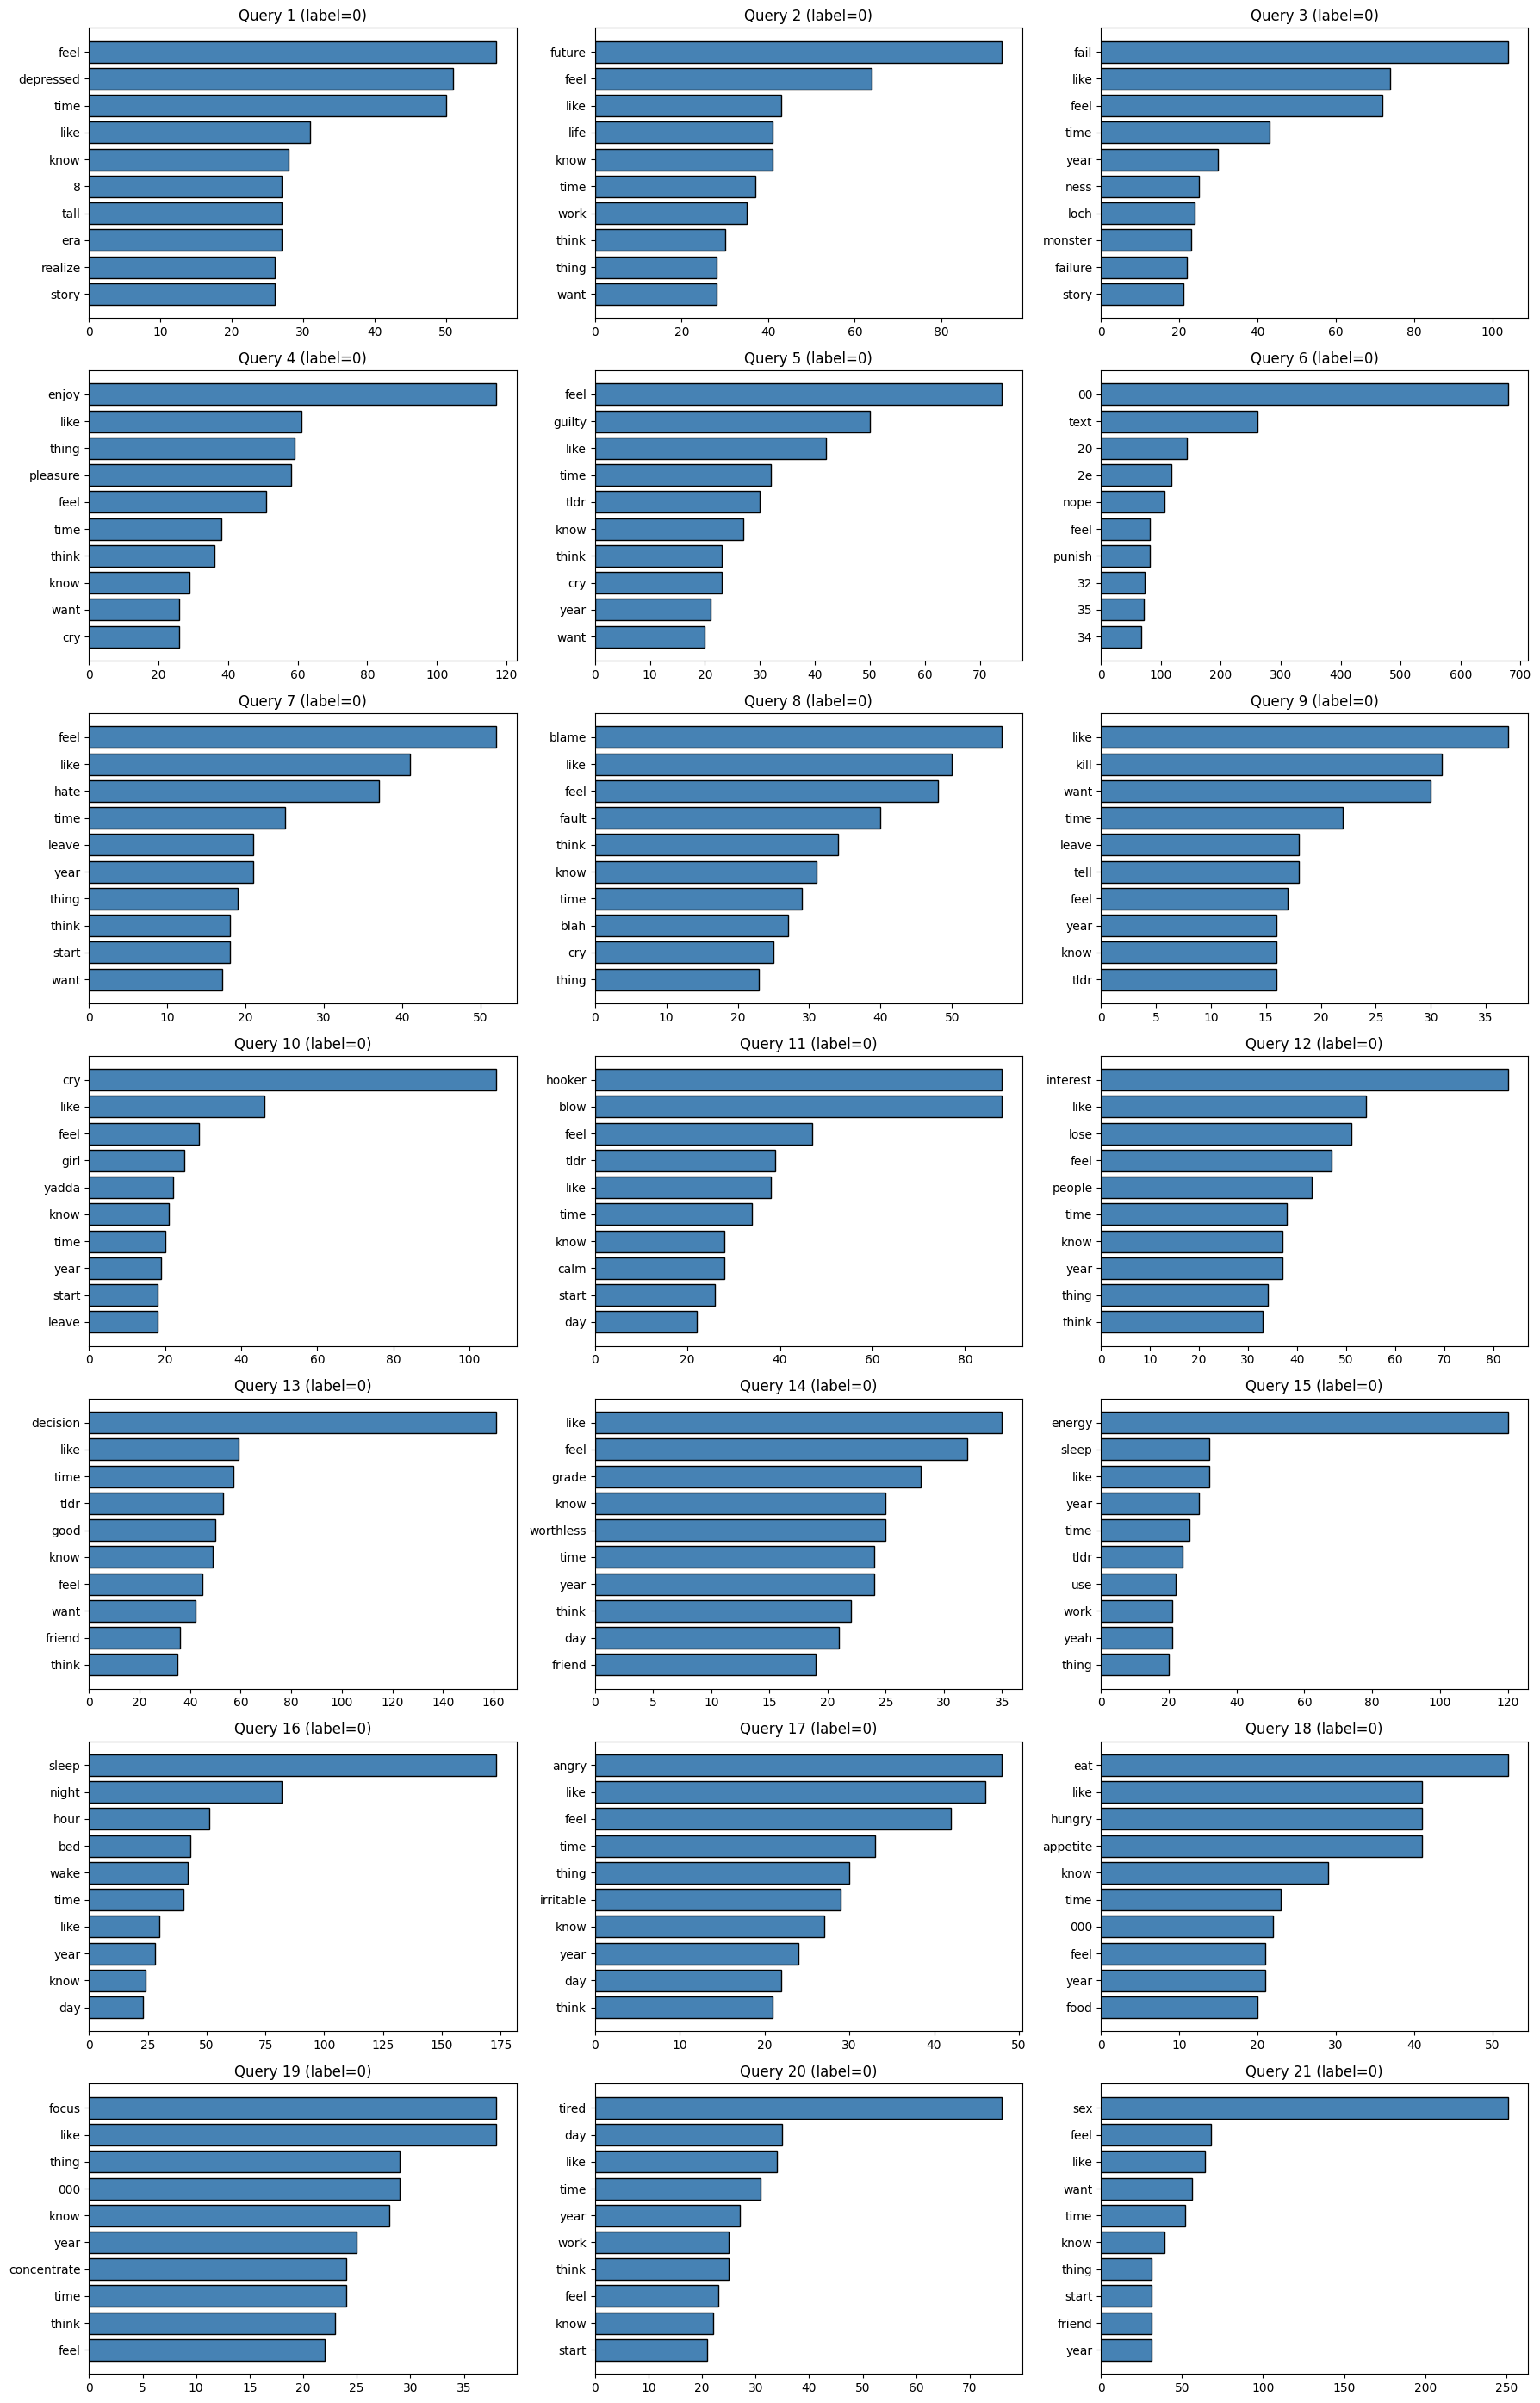

In [21]:
import matplotlib.pyplot as plt
from collections import Counter

df_rel = df[df["label"] == 0]

queries = sorted(df_rel["query"].unique())

cols = 3
rows = (len(queries) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))

for i, q in enumerate(queries):
    r, c = divmod(i, cols)
    ax = axes[r, c] if rows > 1 else axes[c]

    tokens = [w for toks in df_rel.loc[df_rel["query"] == q, "token_no_stop"] for w in toks]

    counter = Counter(tokens)
    top_words = counter.most_common(10)

    if top_words:
        words, freqs = zip(*top_words)
        ax.barh(range(len(words)), freqs, color="steelblue", edgecolor="black")
        ax.set_yticks(range(len(words)))
        ax.set_yticklabels(words)
        ax.invert_yaxis()  
        ax.set_title(f"Query {q} (label=0)")
    else:
        ax.set_title(f"Query {q} (No data)")
        ax.axis("off")

for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from itertools import chain

QUERIES = list(range(1, 22))  # 1..21
COL_QUERY = "query"
COL_LABEL = "label"
COL_TOKENS = "token_no_stop"

def top_diff_words_per_query(df, queries=QUERIES, col_q=COL_QUERY, col_y=COL_LABEL, col_tokens=COL_TOKENS, k=5):
    dfx = df[(df[col_q].isin(queries)) & (df[col_y].isin([0,1]))].copy()
    dfx = dfx[dfx[col_tokens].apply(lambda x: isinstance(x, (list, tuple)))]

    results = []
    for q in queries:
        dqq = dfx[dfx[col_q] == q]
        if dqq.empty:
            results.append({
                "query": q,
                "top_words": [],
                "direction": []
            })
            continue

        counts = {0: Counter(), 1: Counter()}
        for y, toks in zip(dqq[col_y], dqq[col_tokens]):
            counts[y].update(toks)

        n0 = sum(counts[0].values())
        n1 = sum(counts[1].values())

        vocab = set(counts[0].keys()) | set(counts[1].keys())
        if len(vocab) == 0:
            results.append({
                "query": q,
                "top_words": [],
                "direction": []
            })
            continue

        pooled = counts[0] + counts[1]
        total_pooled = sum(pooled.values())
        alpha0 = 2.0
        alpha = {w: alpha0 * (pooled[w] / total_pooled) for w in vocab}

        z_scores = {}
        dirs = {}
        for w in vocab:
            a = alpha[w]
            y0 = counts[0][w]
            y1 = counts[1][w]

            logit0 = np.log((y0 + a) / ( (n0 + alpha0) - (y0 + a) ))
            logit1 = np.log((y1 + a) / ( (n1 + alpha0) - (y1 + a) ))
            delta = logit1 - logit0
            var = 1.0 / (y1 + a) + 1.0 / (y0 + a)
            z = delta / np.sqrt(var)

            z_scores[w] = z
            dirs[w] = "toward_1" if z > 0 else "toward_0"

        top = sorted(vocab, key=lambda w: abs(z_scores[w]), reverse=True)[:k]
        results.append({
            "query": q,
            "top_words": top,
            "direction": [dirs[w] for w in top],
            "z_scores": [float(z_scores[w]) for w in top]
        })

    out_rows = []
    for row in results:
        q = row["query"]
        for w, d, z in zip(row.get("top_words", []), row.get("direction", []), row.get("z_scores", [])):
            out_rows.append({"query": q, "word": w, "direction": d, "z": z})
    out = pd.DataFrame(out_rows).sort_values(["query", "z"], ascending=[True, False]).reset_index(drop=True)
    return out

top_diff = top_diff_words_per_query(df)

top5_by_query = (top_diff.groupby("query")
                 .apply(lambda g: g.nlargest(5, "z")[["word", "direction", "z"]].to_dict(orient="records"))
                 .to_dict())

print(top_diff.head(30))
for q in sorted(top_diff["query"].unique()):
    g = top_diff[top_diff["query"] == q].head(5)
    print(f"\nQuery {q}:")
    for _, r in g.iterrows():
        print(f"  {r['word']:>20s}  | {r['direction']:>8s} | z={r['z']:.3f}")


    query       word direction          z
0       1        sad  toward_1  15.223179
1       1       feel  toward_1  15.076221
2       1  depressed  toward_1  11.645249
3       1       time  toward_1   5.390199
4       1      happy  toward_1   4.539288
5       2     future  toward_1  13.761695
6       2       feel  toward_1   9.987292
7       2   hopeless  toward_1   6.353328
8       2       hope  toward_1   4.914324
9       2       life  toward_1   4.668507
10      3       feel  toward_1  14.779724
11      3    failure  toward_1  14.578656
12      3       like  toward_1  13.438014
13      3       life  toward_1   4.886057
14      3       fail  toward_1   4.432700
15      4      enjoy  toward_1  12.980876
16      4        use  toward_1  11.260863
17      4      thing  toward_1  10.783273
18      4    anymore  toward_1   8.220630
19      4       find  toward_1   7.532218
20      5       feel  toward_1  21.705937
21      5     guilty  toward_1  19.549646
22      5      guilt  toward_1   6

C:\Users\thaip\AppData\Local\Temp\ipykernel_13176\3639683498.py:82: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(5, "z")[["word", "direction", "z"]].to_dict(orient="records"))


In [23]:
df.to_csv("dataset_2024_clean_2.csv",index=False)